# IT'S TIME TO GENERATE NEW CARS IMAGES

### Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Imports

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os

### Configs

In [5]:
EXPERIMENT_ID = "train_3"
MODEL_SAVE_PATH = os.path.join("/content/drive/MyDrive/Deep_Learning/GAN/results/vanilla_GAN_DCGAN", EXPERIMENT_ID)
CHECKPOINT_DIR = os.path.join(MODEL_SAVE_PATH, 'training_checkpoints')
LR = 2e-4
LATENT_DEPTH = 100

## Loading Checkpoint

![Inference.png](https://drive.google.com/uc?export=view&id=12JP9twsCjRrOuWBL_uws4Wt0ySUK8EsF)

Measure the GAN performance by:

* Images Quality
* Images Diversity

In [6]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(25*25*128, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Reshape((25, 25, 128)))
    assert model.output_shape == (None, 25, 25, 128) 

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 25, 25, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 50, 50, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 100, 100, 3)
    model.add(layers.Activation('sigmoid'))
    model.summary()
    
    return model

In [7]:
generator = make_generator_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80000)             8000000   
_________________________________________________________________
batch_normalization (BatchNo (None, 80000)             320000    
_________________________________________________________________
re_lu (ReLU)                 (None, 80000)             0         
_________________________________________________________________
reshape (Reshape)            (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 25, 25, 128)       409600    
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 128)       512       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 25, 25, 128)       0

In [9]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=LR, beta_1=0.5)

In [10]:
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer, generator=generator)

In [11]:
checkpoint.restore(tf.train.latest_checkpoint(CHECKPOINT_DIR))

## Inference

After using the inference method we can tell if there is model collapse or no

In [12]:
def generate_and_save_images(model, LATENT_DEPTH):
    
    plt.figure(figsize=(15,10))
    for i in range(4):
        # tf.random.normal will make the image generation random and change each time the inference
        input_ = tf.random.normal([1, LATENT_DEPTH])
        images = model(input_, training=False)

        image = images[0, :, :, :]
        image = np.reshape(image, [100, 100, 3])

        plt.subplot(1, 4, i+1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title("Randomly Generated Images")

    plt.tight_layout()  
    plt.savefig('Generated Images')
    plt.show()

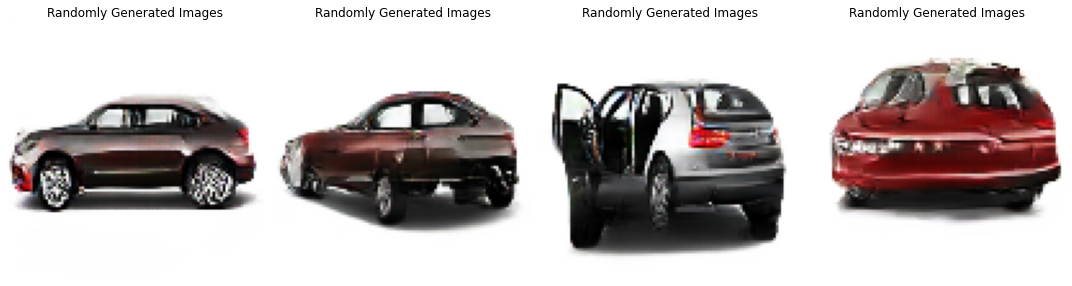

In [15]:
generate_and_save_images(generator, LATENT_DEPTH)